In [16]:
import pandas as pd

In [67]:
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas_profiling

In [231]:
data = pd.read_csv('C:/csv_file/bank-full.csv')

In [237]:
ov = data.profile_report()
ov

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [232]:
pd.set_option('float_format', '{:.2f}'.format)

In [233]:
pd.options.mode.chained_assignment = None

In [234]:
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
data.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [59]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [60]:
data_rp = data.replace({'married' : 2, 'single' : 1, 'divorced': 3, 'primary' : 1, 'secondary' : 2,
       'tertiary' : 3, 'unknown' : 3, 'no' : 1, 'yes': 2, 'may' : 5,'jul' :7, 'aug' :8,
                        'jun' :6,'nov' :11,'apr' :4,'feb' : 2,'jan' :1,'oct' :10,'sep' :9,
                        'mar' :3, 'dec' :12, 'cellular' : 1, 'telephone' : 2, 'success' : 1, 'failure' : 2, 'other' : 3})

In [61]:
data_rp

age           job  marital  education  default  balance  housing  loan  \
0       58    management        2          3        1     2143        2     1   
1       44    technician        1          2        1       29        2     1   
2       33  entrepreneur        2          2        1        2        2     2   
3       47   blue-collar        2          0        1     1506        2     1   
4       33             0        1          0        1        1        1     1   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45206   51    technician        2          3        1      825        1     1   
45207   71       retired        3          1        1     1729        1     1   
45208   72       retired        2          2        1     5715        1     1   
45209   57   blue-collar        2          2        1      668        1     1   
45210   37  entrepreneur        2          2        1     2971        1     1   

       contact  day  month  duration  campaign  pdays  previous  poutcome  y  
0            0    5      5       261         1     -1         0         0  1  
1            0    5      5       151         1     -1         0         0  1  
2            0    5      5        76         1     -1         0         0  1  
3            0    5      5        92         1     -1         0         0  1  
4            0    5      5       198         1     -1         0         0  1  
...        ...  ...    ...       ...       ...    ...       ...       ... ..  
45206        1   17     11       977         3     -1         0         0  2  
45207        1   17     11       456         2     -1         0         0  2  
45208        1   17     11      1127         5    184         3         1  2  
45209        2   17     11       508         4     -1         0         0  1  
45210        1   17     11       361         2    188        11         3  1  

[45211 rows x 17 columns]

In [64]:
data_rp.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

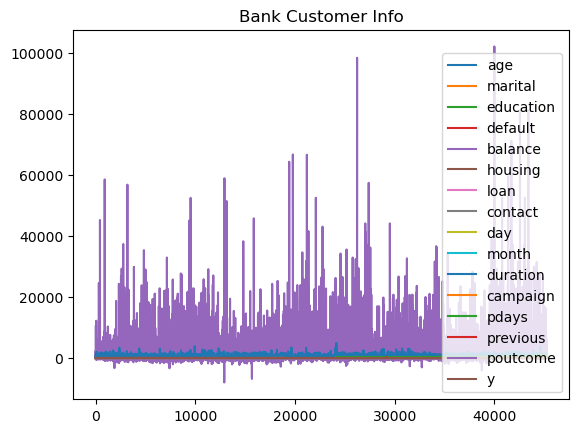

In [75]:
data_rp.plot()
plt.title("Bank Customer Info")
plt.show()

In [76]:
data_rp.apply(pd.unique)

age          [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...
job          [management, technician, entrepreneur, blue-co...
marital                                              [2, 1, 3]
education                                         [3, 2, 0, 1]
default                                                 [1, 2]
balance      [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...
housing                                                 [2, 1]
loan                                                    [1, 2]
contact                                              [0, 1, 2]
day          [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...
month                  [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9]
duration     [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...
campaign     [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...
pdays        [-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...
previous     [0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...
poutcome                                          [0, 2

In [77]:
data_rp['default'][data_rp['default'] == 1]

0        1
1        1
2        1
3        1
4        1
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: default, Length: 44396, dtype: int64

In [78]:
data_rp['default'][data_rp['default'] != 1]

7        2
79       2
338      2
419      2
458      2
        ..
41562    2
44099    2
44161    2
44302    2
44606    2
Name: default, Length: 815, dtype: int64

In [79]:
data_rp['loan'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: loan, Length: 45211, dtype: bool

In [80]:
len(data_rp['loan'])

45211

In [81]:
data_rp['loan_yn'] = data_rp['loan'].replace({1: 'yes', 2 : 'no'})

In [82]:
data_rp

age           job  marital  education  default  balance  housing  loan  \
0       58    management        2          3        1     2143        2     1   
1       44    technician        1          2        1       29        2     1   
2       33  entrepreneur        2          2        1        2        2     2   
3       47   blue-collar        2          0        1     1506        2     1   
4       33             0        1          0        1        1        1     1   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45206   51    technician        2          3        1      825        1     1   
45207   71       retired        3          1        1     1729        1     1   
45208   72       retired        2          2        1     5715        1     1   
45209   57   blue-collar        2          2        1      668        1     1   
45210   37  entrepreneur        2          2        1     2971        1     1   

       contact  day  month  duration  campaign  pdays  previous  poutcome  y  \
0            0    5      5       261         1     -1         0         0  1   
1            0    5      5       151         1     -1         0         0  1   
2            0    5      5        76         1     -1         0         0  1   
3            0    5      5        92         1     -1         0         0  1   
4            0    5      5       198         1     -1         0         0  1   
...        ...  ...    ...       ...       ...    ...       ...       ... ..   
45206        1   17     11       977         3     -1         0         0  2   
45207        1   17     11       456         2     -1         0         0  2   
45208        1   17     11      1127         5    184         3         1  2   
45209        2   17     11       508         4     -1         0         0  1   
45210        1   17     11       361         2    188        11         3  1   

      loan_yn  
0         yes  
1         yes  
2          no  
3         yes  
4         yes  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209     yes  
45210     yes  

[45211 rows x 18 columns]

In [83]:
data_rp['loan_yn'].unique()

array(['yes', 'no'], dtype=object)

In [84]:
data_rp['loan_yn'] =data_rp['loan_yn'].astype('category')

In [85]:
data_rp['loan_yn'] = data_rp['loan_yn'].cat.set_categories(['no', 'yes'], ordered = True)

In [86]:
data_rp['loan_yn'].unique()

['yes', 'no']
Categories (2, object): ['no' < 'yes']

In [87]:
data_rp['loan_yn'].values.categories

Index(['no', 'yes'], dtype='object')

In [88]:
data_rp['loan_yn'].value_counts()

yes    37967
no      7244
Name: loan_yn, dtype: int64

In [90]:
data_rp['loan_yn'].value_counts(normalize = False, dropna = True, sort = True, ascending = False)

yes    37967
no      7244
Name: loan_yn, dtype: int64

In [91]:
data_rp

age           job  marital  education  default  balance  housing  loan  \
0       58    management        2          3        1     2143        2     1   
1       44    technician        1          2        1       29        2     1   
2       33  entrepreneur        2          2        1        2        2     2   
3       47   blue-collar        2          0        1     1506        2     1   
4       33             0        1          0        1        1        1     1   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45206   51    technician        2          3        1      825        1     1   
45207   71       retired        3          1        1     1729        1     1   
45208   72       retired        2          2        1     5715        1     1   
45209   57   blue-collar        2          2        1      668        1     1   
45210   37  entrepreneur        2          2        1     2971        1     1   

       contact  day  month  duration  campaign  pdays  previous  poutcome  y  \
0            0    5      5       261         1     -1         0         0  1   
1            0    5      5       151         1     -1         0         0  1   
2            0    5      5        76         1     -1         0         0  1   
3            0    5      5        92         1     -1         0         0  1   
4            0    5      5       198         1     -1         0         0  1   
...        ...  ...    ...       ...       ...    ...       ...       ... ..   
45206        1   17     11       977         3     -1         0         0  2   
45207        1   17     11       456         2     -1         0         0  2   
45208        1   17     11      1127         5    184         3         1  2   
45209        2   17     11       508         4     -1         0         0  1   
45210        1   17     11       361         2    188        11         3  1   

      loan_yn  
0         yes  
1         yes  
2          no  
3         yes  
4         yes  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209     yes  
45210     yes  

[45211 rows x 18 columns]

In [92]:
data_rp['loan_yn'].value_counts(normalize = True)

yes   0.84
no    0.16
Name: loan_yn, dtype: float64

In [96]:
item = data_rp['loan_yn'].value_counts().index

In [95]:
freq = data_rp['loan_yn'].value_counts().values

In [99]:
pct = data_rp['loan_yn'].value_counts(normalize = True).values

In [100]:
loan_tb = pd.DataFrame({'item':item, 'freq' : freq, 'pct': pct})
loan_tb

item   freq  pct
0  yes  37967 0.84
1   no   7244 0.16

Text(0.5, 1.0, 'Bank customer loan survice')

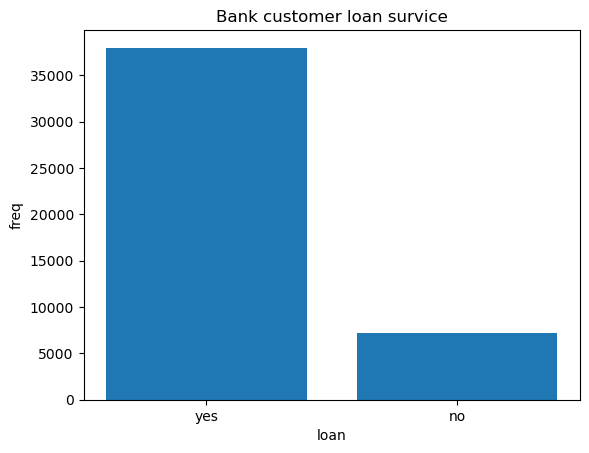

In [104]:
plt.figure()
plt.bar(x = loan_tb['item'], height = loan_tb['freq'])
plt.xlabel('loan')
plt.ylabel('freq')
plt.title('Bank customer loan survice')

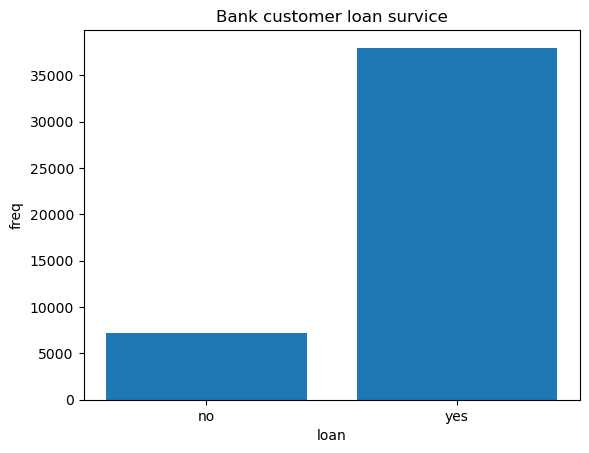

In [106]:
plt.figure()
plt.bar(x = loan_tb['item'], height = loan_tb['freq'])
plt.xlabel('loan')
plt.ylabel('freq')
plt.title('Bank customer loan survice')


plt.gca().invert_xaxis()

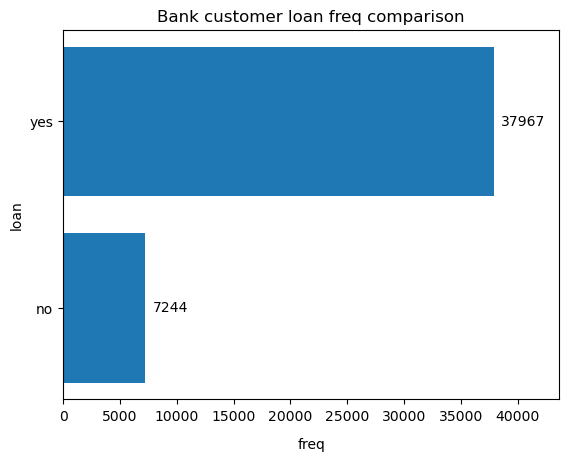

In [124]:
fig, ax = plt.subplots()

ax.barh(y = loan_tb['item'], width = loan_tb['freq'])

ax.set_xlabel('freq', labelpad = 10)
ax.set_ylabel('loan')
ax.set_title('Bank customer loan freq comparison')
ax.invert_yaxis()

ax.bar_label(ax.containers[0], padding = 5)
ax.margins(x = 0.15) #0.2 는 간격이 10,000단위


In [125]:
## 원 그래프


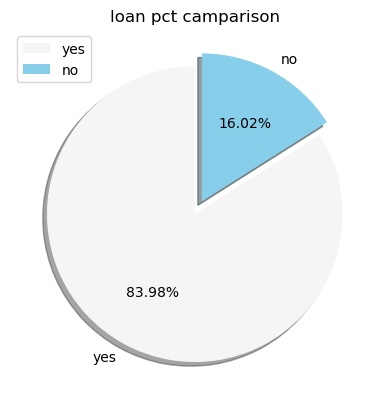

In [156]:
plt.figure()
plt.pie(x = loan_tb['freq'], labels = loan_tb['item'], autopct = '%.2f%%',
       startangle = 90, counterclock = True, labeldistance = 1.1,
       explode = (0,0.1), shadow = True, colors = ['whitesmoke', 'skyblue'])

#autopct = 숫자 형식 지정
# startangle = 시작 지점
# counterclock 시계방향 순서로 부채꼴 표시 True =오른쪽, False = 왼쪽으로
# explode = 간격 조정
# shadow = 그림자 *True = 있음, False = 없음
# labeldistance = 라벨 거리 조정 1.1 디폴트


plt.title('loan pct camparison')
plt.legend()

In [228]:
data_rp['contact_ct'].replace(0, np.NaN)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact_ct, Length: 45211, dtype: category
Categories (2, object): ['cellular' < 'telephone']

In [227]:
data_rp

age           job  marital  education  default  balance  housing  loan  \
0       58    management        2          3        1     2143        2     1   
1       44    technician        1          2        1       29        2     1   
2       33  entrepreneur        2          2        1        2        2     2   
3       47   blue-collar        2          0        1     1506        2     1   
4       33             0        1          0        1        1        1     1   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45206   51    technician        2          3        1      825        1     1   
45207   71       retired        3          1        1     1729        1     1   
45208   72       retired        2          2        1     5715        1     1   
45209   57   blue-collar        2          2        1      668        1     1   
45210   37  entrepreneur        2          2        1     2971        1     1   

       contact  day  month  duration  campaign  pdays  previous  poutcome  y  \
0            0    5      5       261         1     -1         0         0  1   
1            0    5      5       151         1     -1         0         0  1   
2            0    5      5        76         1     -1         0         0  1   
3            0    5      5        92         1     -1         0         0  1   
4            0    5      5       198         1     -1         0         0  1   
...        ...  ...    ...       ...       ...    ...       ...       ... ..   
45206        1   17     11       977         3     -1         0         0  2   
45207        1   17     11       456         2     -1         0         0  2   
45208        1   17     11      1127         5    184         3         1  2   
45209        2   17     11       508         4     -1         0         0  1   
45210        1   17     11       361         2    188        11         3  1   

      loan_yn marital_mt contact_ct  
0         yes  telephone        NaN  
1         yes   cellular        NaN  
2          no  telephone        NaN  
3         yes  telephone        NaN  
4         yes   cellular        NaN  
...       ...        ...        ...  
45206     yes  telephone   cellular  
45207     yes        NaN   cellular  
45208     yes  telephone   cellular  
45209     yes  telephone  telephone  
45210     yes  telephone   cellular  

[45211 rows x 20 columns]

In [229]:
data_rp['contact_ct'].dropna(axis = 0)

12657     cellular
12658     cellular
12659     cellular
12660    telephone
12661     cellular
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact_ct, Length: 32191, dtype: category
Categories (2, object): ['cellular' < 'telephone']

In [230]:
len(data_rp['contact_ct'])

45211

In [218]:
data_rp['contact'].head()

0    0
1    0
2    0
3    0
4    0
Name: contact, dtype: int64

In [197]:
data_rp['contact_ct'] = data_rp['contact'].replace({1 : 'cellular', 2 : 'telephone', 3: None})

In [198]:
data_rp['contact_ct'] = data_rp['contact_ct'].astype('category')

In [199]:
data_rp['contact_ct'] = data_rp['contact_ct'].cat.set_categories(['cellular','telephone'], ordered = True)

In [200]:
data_rp['contact_ct'].unique()

[NaN, 'cellular', 'telephone']
Categories (2, object): ['cellular' < 'telephone']

In [201]:
data_rp['contact_ct'].values.categories

Index(['cellular', 'telephone'], dtype='object')

In [202]:
data_rp['contact_ct'].value_counts()

cellular     29285
telephone     2906
Name: contact_ct, dtype: int64

In [203]:
data_rp['contact_ct'].value_counts(normalize = False, dropna = True, sort = True, ascending = False)

cellular     29285
telephone     2906
Name: contact_ct, dtype: int64

In [204]:
item1 = data_rp['contact_ct'].value_counts().index
freq1 = data_rp['contact_ct'].value_counts().values
pct1 = data_rp['contact_ct'].value_counts(normalize = True).values

In [205]:
contact_ct = pd.DataFrame({'item':item1, 'freq': freq1, 'pct' : pct1})

In [206]:
contact_ct

item   freq  pct
0   cellular  29285 0.91
1  telephone   2906 0.09

In [208]:
data_rp['contact'].value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

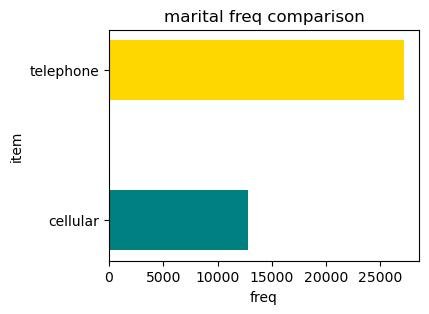

In [196]:
plt.figure(figsize = (4,3 ))
plt.barh(y = marital_mt['item'], width = marital_mt['freq'], height = 0.4, color = ['gold', 'teal'])

plt.xlabel('freq')
plt.ylabel('item')
plt.title('marital freq comparison')


plt.gca().invert_yaxis()

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
ax.barh(y = marital_mt['item'])